# ingfo

*	CRIM - per capita crime rate by town
*	ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
*	INDUS - proportion of non-retail business acres per town.
*	CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
*	NOX - nitric oxides concentration (parts per 10 million)
*	RM - average number of rooms per dwelling
*	AGE - proportion of owner-occupied units built prior to 1940
*	DIS - weighted distances to five Boston employment centres
*	RAD - index of accessibility to radial highways
*	TAX - full-value property-tax rate per $10,000
*	PTRATIO - pupil-teacher ratio by town
*	B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
*	LSTAT - % lower status of the population
*	MEDV - Median value of owner-occupied homes in $1000's

# Run all

## Import Sak Ndayak

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
locdata = ('/content/drive/My Drive/Python/')
dataku = (locdata + 'boston_train.csv')

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
!pip install category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.2 MB/s eta 0:00:00


## data prep

In [ ]:
df = pd.read_csv(dataku)
inuse = df.copy()

In [ ]:
inuse

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [ ]:
inuse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [ ]:
inuse.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [ ]:
inuse.drop(['ID'], axis = 1, inplace = True)

In [ ]:
inuse

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [ ]:
inuse.shape[1]

14

In [ ]:
inuse.isna().sum()/inuse.shape[0]*100

crim       0.0
zn         0.0
indus      0.0
chas       0.0
nox        0.0
rm         0.0
age        0.0
dis        0.0
rad        0.0
tax        0.0
ptratio    0.0
black      0.0
lstat      0.0
medv       0.0
dtype: float64

berhubung data e udah bersih, i'll move on then. Kan udah ga perlu dibersihin :>

## data viz

<AxesSubplot:>

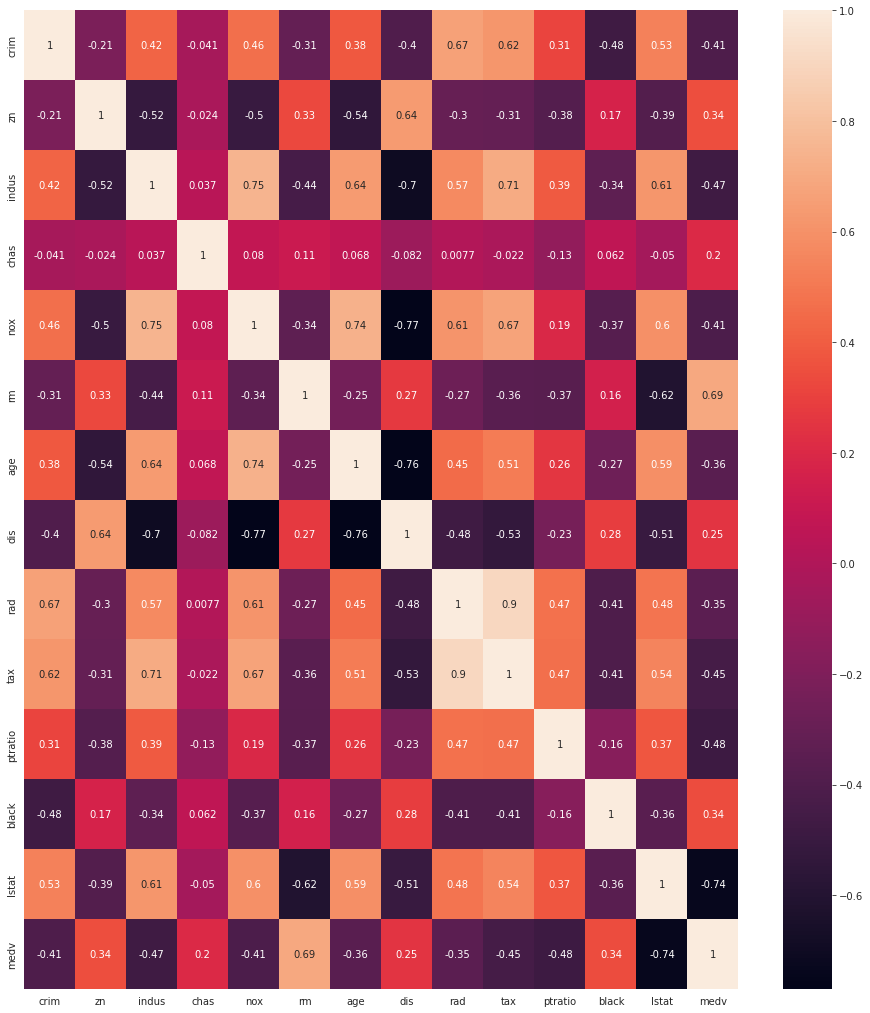

In [ ]:
corr = inuse.corr()
plt.figure(figsize=(16,18))
sns.heatmap(corr,annot = True)

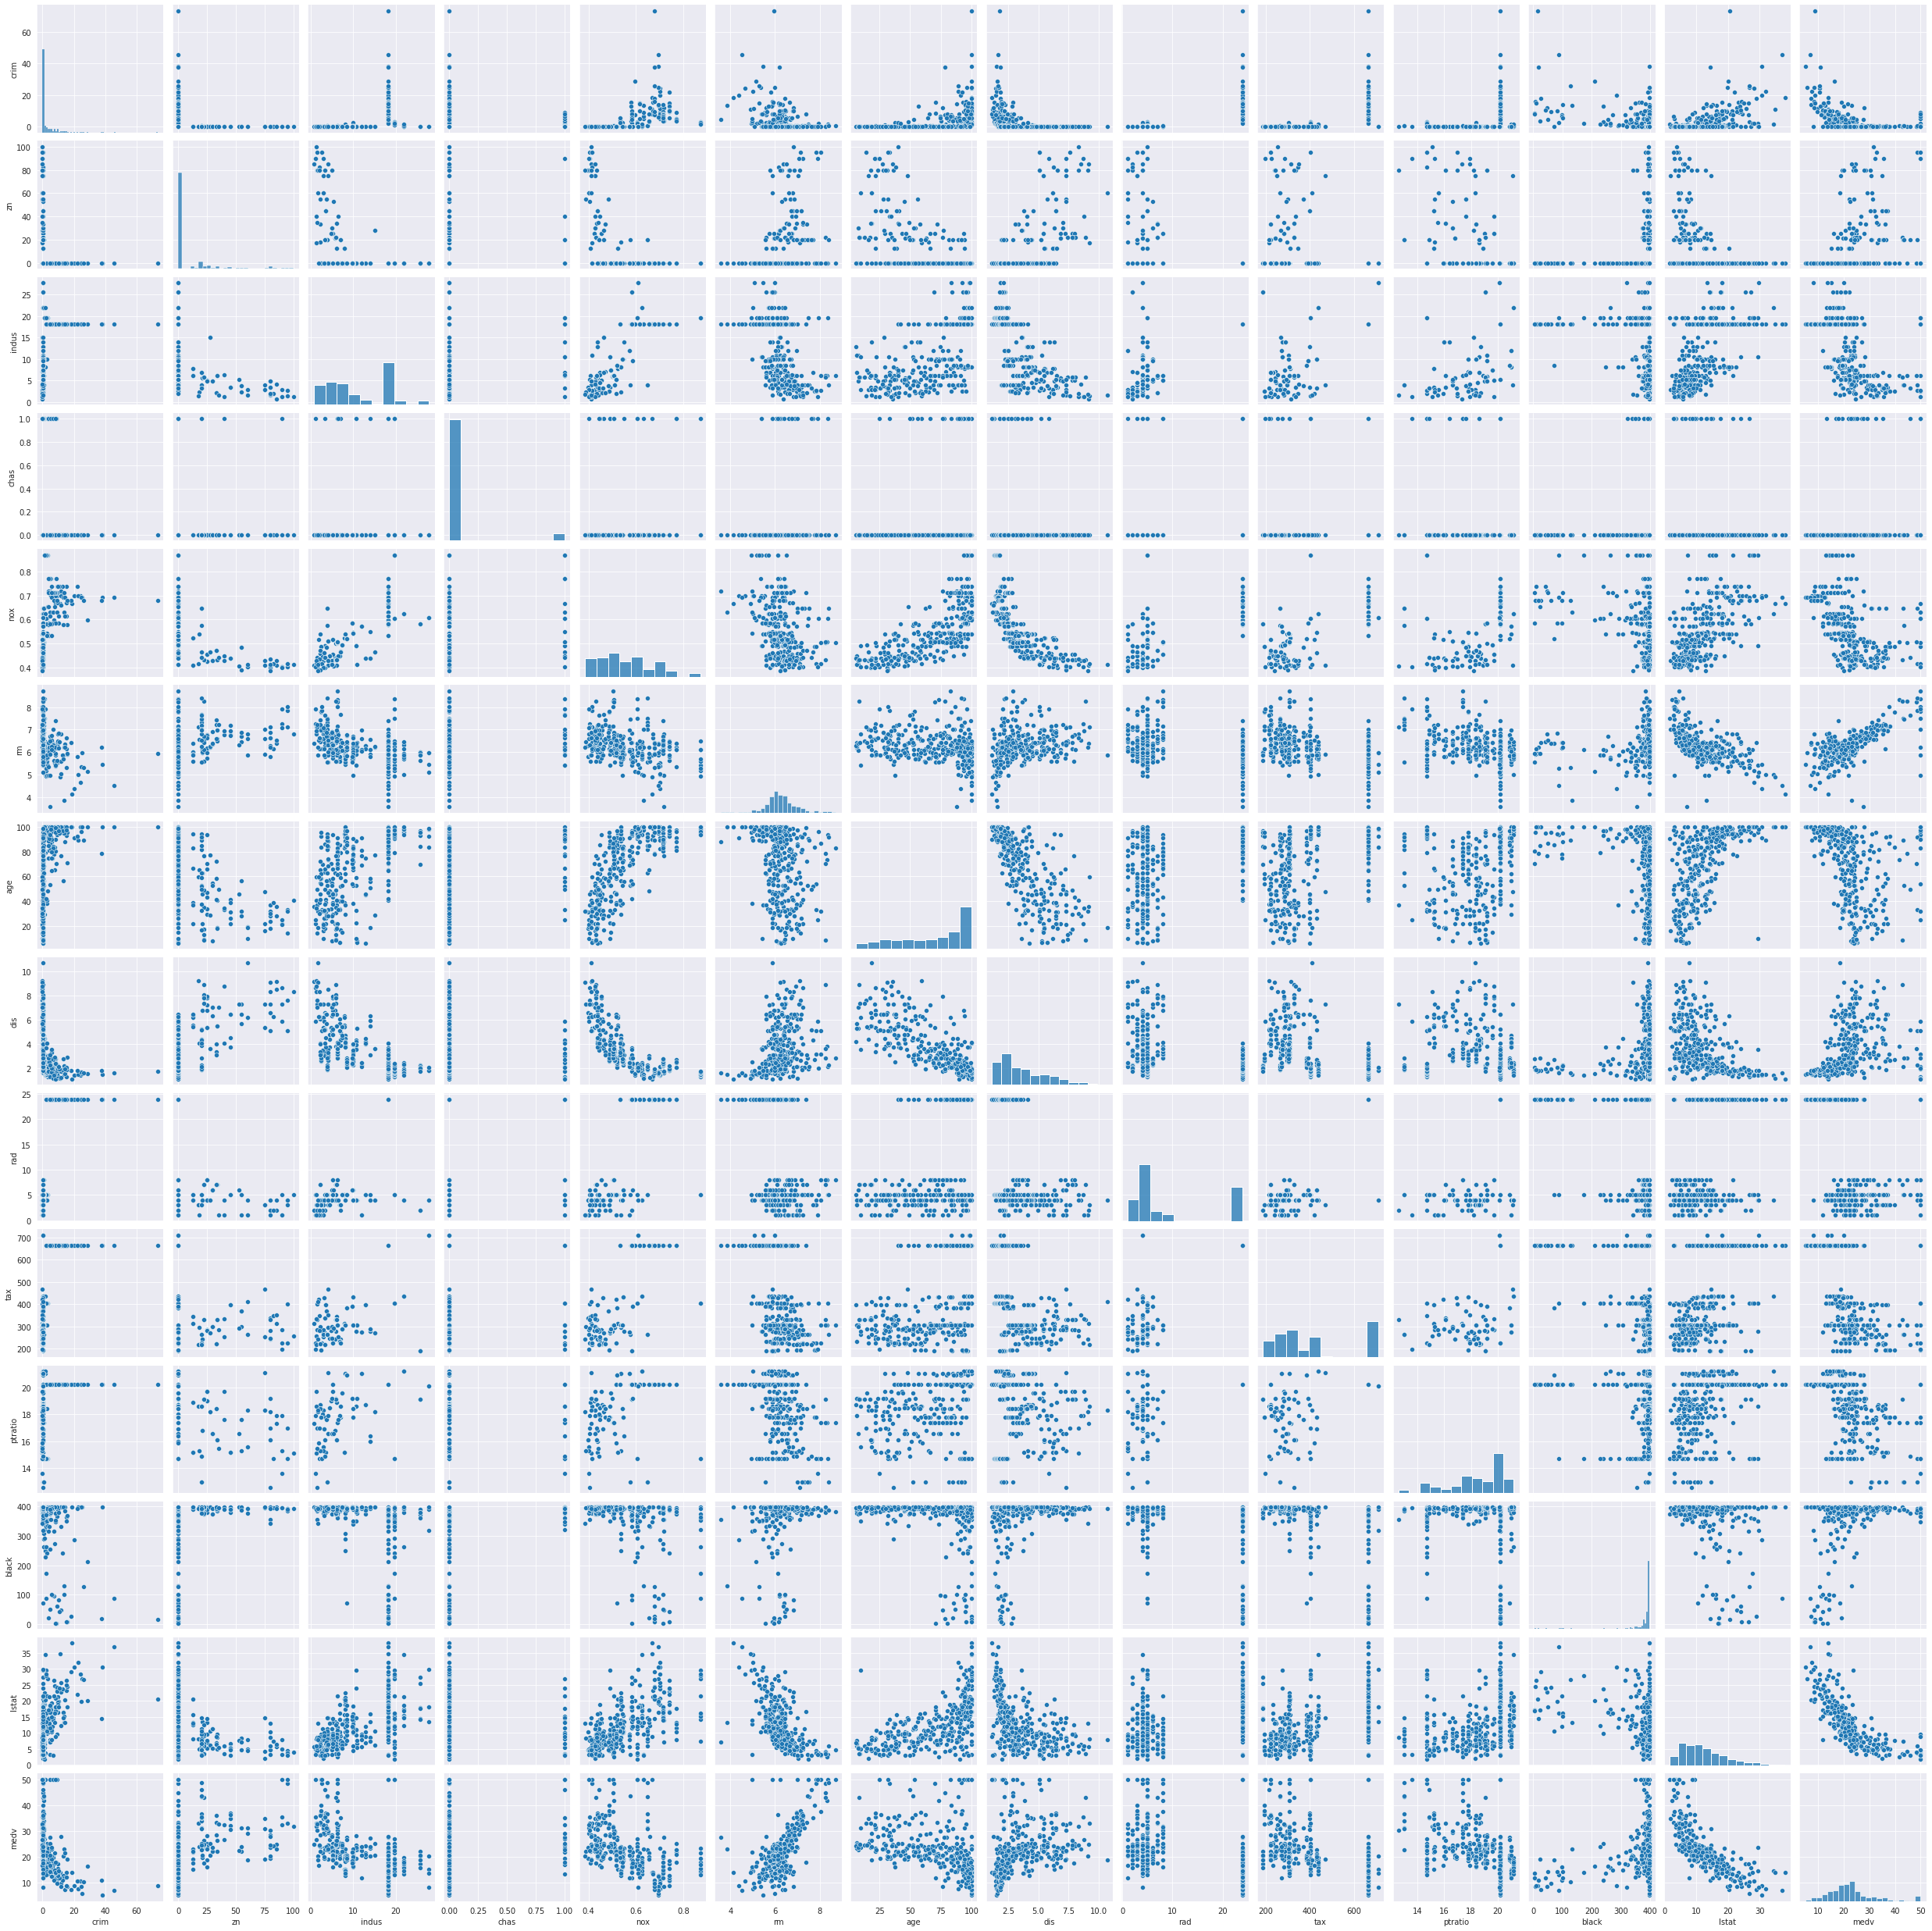

In [ ]:
sns.pairplot(inuse)

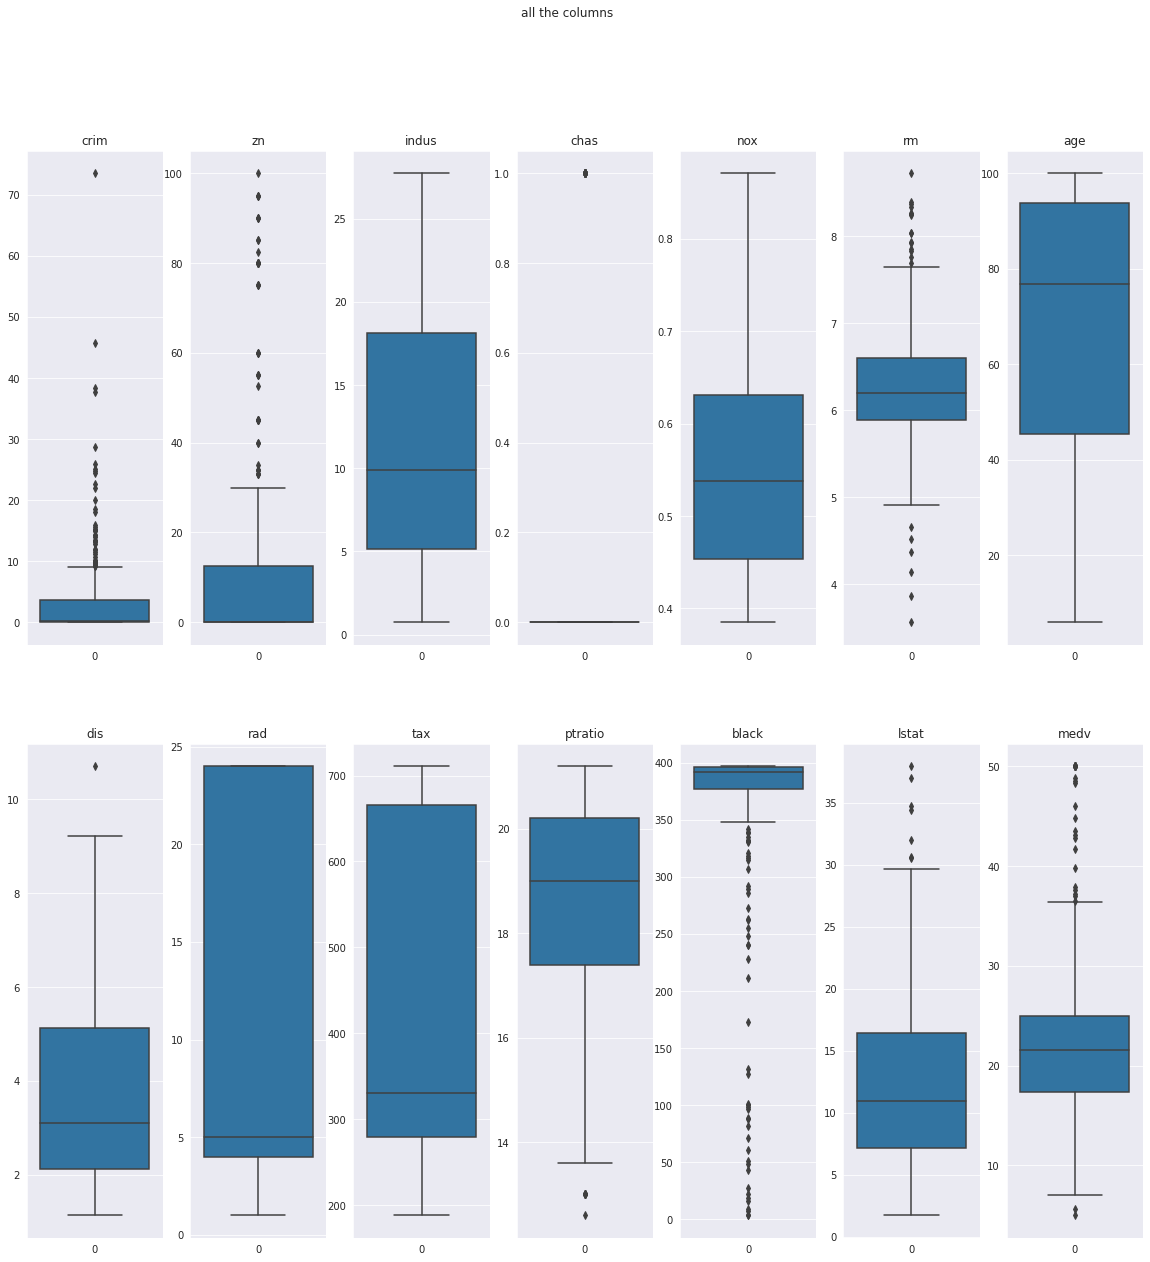

In [ ]:
fig, axes = plt.subplots(2, 7, figsize=(20,20))
fig.suptitle('all the columns')
a = 0
for i in range(2):
  for j in range(7):
    axes[i,j].set_title(inuse.columns[a])
    sns.boxplot(ax = axes [i][j], data = inuse[inuse.columns[a]])
    a+=1

<AxesSubplot:>

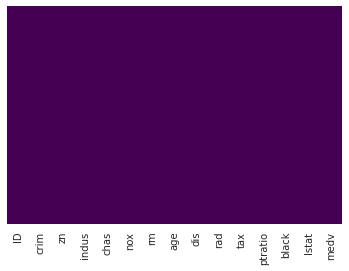

In [ ]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)

In [ ]:
x = inuse['medv']
y = inuse['age']

## modelling

### ga pake minmax nor pca

In [ ]:
inuse

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [ ]:
X = inuse.drop(['medv'], axis = 1)
y = inuse['medv']

In [ ]:
y

0      24.0
1      21.6
2      33.4
3      36.2
4      22.9
       ... 
328    17.5
329    22.4
330    20.6
331    23.9
332    11.9
Name: medv, Length: 333, dtype: float64

In [ ]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size = 0.25 , random_state = 10)

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# print('Accuracy of the Model: {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

In [ ]:
print('MSE: ', metrics.mean_squared_error(y_test,y_pred))
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred))t
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MSE:  18.515833333333333
MAE:  3.134523809523809
RMSE:  4.3030028274837715


### pake pca sama minmax, does it do any good?

In [ ]:
mm = MinMaxScaler()
x = inuse.drop(['medv'], axis = 1)
y = inuse['medv']
atarashii = mm.fit_transform(x)
pd.DataFrame(data = atarashii, columns = x.columns)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.000000,0.180,0.058148,0.0,0.314815,0.583656,0.629787,0.308996,0.000000,0.206501,0.313953,1.000000,0.089680
1,0.000285,0.000,0.234444,0.0,0.172840,0.553834,0.775532,0.400545,0.043478,0.103250,0.604651,1.000000,0.204470
2,0.000354,0.000,0.053333,0.0,0.150206,0.665569,0.423404,0.514848,0.086957,0.065010,0.709302,0.994230,0.033389
3,0.000853,0.000,0.053333,0.0,0.150206,0.694423,0.512766,0.514848,0.086957,0.065010,0.709302,1.000000,0.099338
4,0.001115,0.125,0.264074,0.0,0.286008,0.474632,0.644681,0.462482,0.173913,0.235182,0.302326,0.996695,0.295254
...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.002333,0.000,0.331481,0.0,0.411523,0.388846,0.718085,0.132589,0.217391,0.388145,0.767442,0.997128,0.368929
329,0.000766,0.000,0.414444,0.0,0.386831,0.587142,0.671277,0.140804,0.000000,0.162524,0.976744,0.987519,0.219095
330,0.000530,0.000,0.414444,0.0,0.386831,0.495546,0.752128,0.120858,0.000000,0.162524,0.976744,1.000000,0.202815
331,0.000740,0.000,0.414444,0.0,0.386831,0.661309,0.904255,0.108332,0.000000,0.162524,0.976744,1.000000,0.107892


In [ ]:
x_train, x_test, y_train,  y_test = train_test_split(x, y, test_size = 0.20 , random_state = 10)

In [ ]:
# datamm = mm.fit_transform(data)

In [ ]:
# datamm = pd.DataFrame(data = datamm, columns = inuse.columns)
# datamm

In [ ]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
print('MSE: ', metrics.mean_squared_error(y_test,y_pred))
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MSE:  12.681044776119405
MAE:  2.559701492537314
RMSE:  3.5610454611138294


### the one and only, PCA himself

In [ ]:
data

array([[-1.19749027e+02, -7.80494730e+00, -3.26295402e+00, ...,
         2.16665107e-02, -1.53787399e-02,  2.15401721e-02],
       [-1.69422406e+02,  5.92672441e+00, -3.08053224e+01, ...,
         9.91927402e-03, -4.98701846e-02, -3.86523206e-02],
       [-1.91400205e+02,  1.28335704e+01, -5.21633584e+00, ...,
        -5.97117122e-02, -7.74026265e-02,  5.01145822e-02],
       ...,
       [-1.39649536e+02, -1.87558884e+00, -2.68972620e+01, ...,
         4.72358427e-02, -3.66976945e-03,  4.43579785e-02],
       [-1.38602821e+02, -1.90350409e+00, -3.73650238e+01, ...,
        -4.88111568e-01, -2.39084498e-02,  3.59731592e-02],
       [-1.39120499e+02, -1.74863605e+00, -3.05475754e+01, ...,
        -1.17183670e-01,  6.75926321e-02,  2.71467200e-02]])

In [ ]:
datapca = pd.DataFrame(data = data, columns = inuse.columns)

In [ ]:
datapca

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,-119.749027,-7.804947,-3.262954,6.134841,1.478030,-0.813156,-6.335464,4.960702,2.902927,2.351239,-0.682521,0.021667,-0.015379,0.021540
1,-169.422406,5.926724,-30.805322,1.370240,-1.423334,0.511637,-3.619405,2.556050,-0.744401,0.318143,1.161597,0.009919,-0.049870,-0.038652
2,-191.400205,12.833570,-5.216336,-18.301536,9.204405,4.094108,-3.040062,0.970775,0.624146,-1.315994,1.237127,-0.059712,-0.077403,0.050115
3,-191.270891,10.644368,-11.775243,-12.833676,10.992225,4.847769,-2.188338,-1.180909,2.014762,-1.885855,1.661208,-0.116093,-0.114918,0.047978
4,-104.129952,-10.262026,-7.446019,2.471803,-2.327585,-0.310560,-1.247268,-0.893851,0.981866,2.615464,1.626956,0.356025,-0.094174,-0.008508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,-25.815177,-30.403525,-13.928879,-4.809398,-5.107538,-2.838408,-2.654756,-0.094901,2.436007,-0.327987,-1.412052,0.333094,-0.006638,0.018165
329,-139.099522,2.830042,-20.811194,-5.347684,-1.565420,-1.746861,1.624137,3.198020,-0.850062,-2.726406,-1.404488,-0.413727,-0.014302,0.057142
330,-139.649536,-1.875589,-26.897262,-0.749247,-2.394484,-2.060302,0.245193,4.427077,-1.632083,-2.501376,-1.517621,0.047236,-0.003670,0.044358
331,-138.602821,-1.903504,-37.365024,8.191947,3.094184,-1.899750,-1.001394,6.537068,-2.463302,-2.795201,-1.165536,-0.488112,-0.023908,0.035973


In [ ]:
xpca = datapca.drop(['medv'], axis = 1)
ypca = datapca.medv

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xpca, ypca, test_size = 0.2, random_state = 10)

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print('MSE: ', metrics.mean_squared_error(y_test,y_pred))
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MSE:  0.005205376166378756
MAE:  0.04434854766823738
RMSE:  0.072148292886102


i guess we can't get any better than this, it's more than enough

## coba coba

In [ ]:
techno = {
    'Courses':["Spark","PySpark","Hadoop","Python","Pandas"],
    'Fee' :[22000,25000,23000,24000,26000],
    'Duration':['30days','50days','30days', None,np.nan],
    'Discount':[1000,2300,1000,1200,2500]
}

In [ ]:
nyar = pd.DataFrame(techno)

In [ ]:
nyar.replace({"Courses":"Spark"}, "Spank", inplace = True)
nyar

,Courses,Fee,Duration,Discount
0,Spank,22000,30days,1000
1,PySpark,25000,50days,2300
2,Hadoop,23000,30days,1000
3,Python,24000,None,1200
4,Pandas,26000,NaN,2500
